In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_drug_df, clinical_trial_df, on ="Mouse ID", how = "outer")

# Display the data table for preview
merge_table.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_by_dt_tumor = merge_table.groupby(['Drug', 'Timepoint'])
grouped_by_dt_tumor_mean = grouped_by_dt_tumor["Tumor Volume (mm3)"]
grouped_by_dt_tumor_mean = grouped_by_dt_tumor_mean.mean()

# Convert to DataFrame
dt_tumor = pd.DataFrame({ "Tumor Volume (mm3)": grouped_by_dt_tumor_mean})


In [3]:
# Preview DataFrame
dt_tumor.head(100)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = merge_table.groupby(['Drug', 'Timepoint']).sem()
standard_error

# Convert to DataFrame

sem_tumor = pd.DataFrame({ "Tumor Volume (mm3)": standard_error["Tumor Volume (mm3)"]})
sem_tumor = sem_tumor.reset_index()
# Preview DataFrame

sem_tumor.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
dt_tumor = dt_tumor.reset_index()
dt_tumor = dt_tumor.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')



In [6]:
# Preview that Reformatting worked
dt_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0, 0.5, 'Tumore Volume (mm3)')

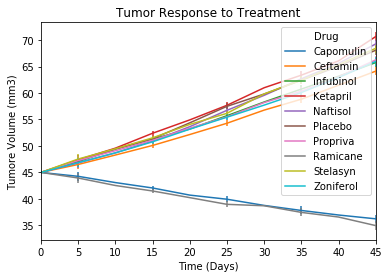

In [7]:
# Generate the Plot (with Error Bars) and # Show the Figure

lines = dt_tumor.plot.line(style='.-', yerr = sem_tumor["Tumor Volume (mm3)"] )

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumore Volume (mm3)")
# Save the Figure



In [8]:
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

grouped_by_drug_timepoint = merge_table.groupby(['Drug', 'Timepoint'])
grouped_by_drug_timepoint_mean = grouped_by_drug_timepoint["Metastatic Sites"]
grouped_by_drug_timepoint_mean = grouped_by_drug_timepoint_mean.mean()

# Convert to DataFrame

drug_timepoint = pd.DataFrame({ "Metastatic Sites": grouped_by_drug_timepoint_mean})

# Preview DataFrame

drug_timepoint.head(100)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

standard_error = merge_table.groupby(['Drug', 'Timepoint']).sem()
standard_error

sem_tumor = pd.DataFrame({ "Metastatic Sites": standard_error["Metastatic Sites"]})
sem_tumor = sem_tumor.reset_index()

# Preview DataFrame

sem_tumor.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames

drug_timepoint = drug_timepoint.reset_index()
drug_timepoint = drug_timepoint.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked

drug_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Text(0, 0.5, 'Met. Sites')

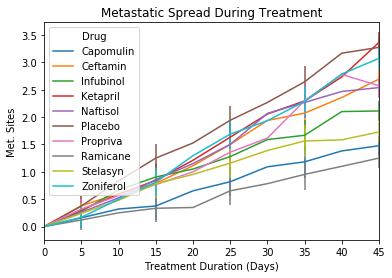

In [12]:
# Generate the Plot (with Error Bars)

lines = drug_timepoint.plot.line(style='.-', yerr = sem_tumor['Metastatic Sites'] )

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")


# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count_drug_timepoint = merge_table.groupby(['Drug', 'Timepoint'])
mouse_drug_timepoint_count = mouse_count_drug_timepoint["Mouse ID"]
mouse_drug_timepoint_count = mouse_drug_timepoint_count.nunique()
mouse_drug_timepoint_count 

# Convert to DataFrame

drug_timepoint = pd.DataFrame({ "Mouse Count": mouse_drug_timepoint_count})
drug_timepoint
# Preview DataFrame


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [14]:
# Minor Data Munging to Re-Format the Data Frames

drug_timepoint = drug_timepoint.reset_index()
drug_timepoint = drug_timepoint.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')

In [15]:
# Preview the Data Frame
drug_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


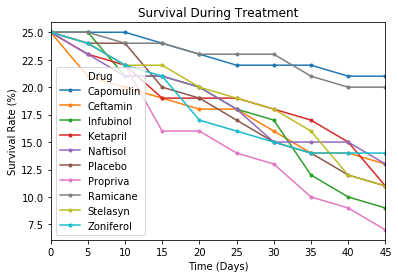

In [16]:
# Generate the Plot (Accounting for percentages)

lines = drug_timepoint.plot.line(style='.-')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")


# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
dt_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [18]:
type(dt_tumor)
dt_tumor = dt_tumor.reset_index()

In [19]:
change = dt_tumor.iloc[9,:]-dt_tumor.iloc[0,:] 
change = change/dt_tumor.iloc[0,:]
change = [i*100 for i in change]
#type(change[0])
del change[0:1]
change

[-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525]

In [20]:
drugs = dt_tumor.columns
drugs = drugs.tolist()
type(drugs)
del drugs[0:1]
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [21]:
# Store all Relevant Percent Changes into a Tuple
zip = zip(drugs, change)
zip = list(zip)
zip

[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.57975086509525)]

In [29]:
# store all positive changes into a list
pos = []
for num in change: 
    # checking condition 
    if num >= 0: 
       pos.append(num)
pos

# store all negative changes into a list
neg = []
for num in change: 
    # checking condition 
    if num < 0: 
       neg.append(num)
neg

# store all positive changes drugs into a list

length = len(zip)
pos_drugs =[]
neg_drugs = []

for i in range(0,length):
    if(zip[i][1]>0):
        temp = zip[i][0]
        pos_drugs.append(temp)
    else:
        neg_drugs.append(zip[i][0])



<BarContainer object of 2 artists>

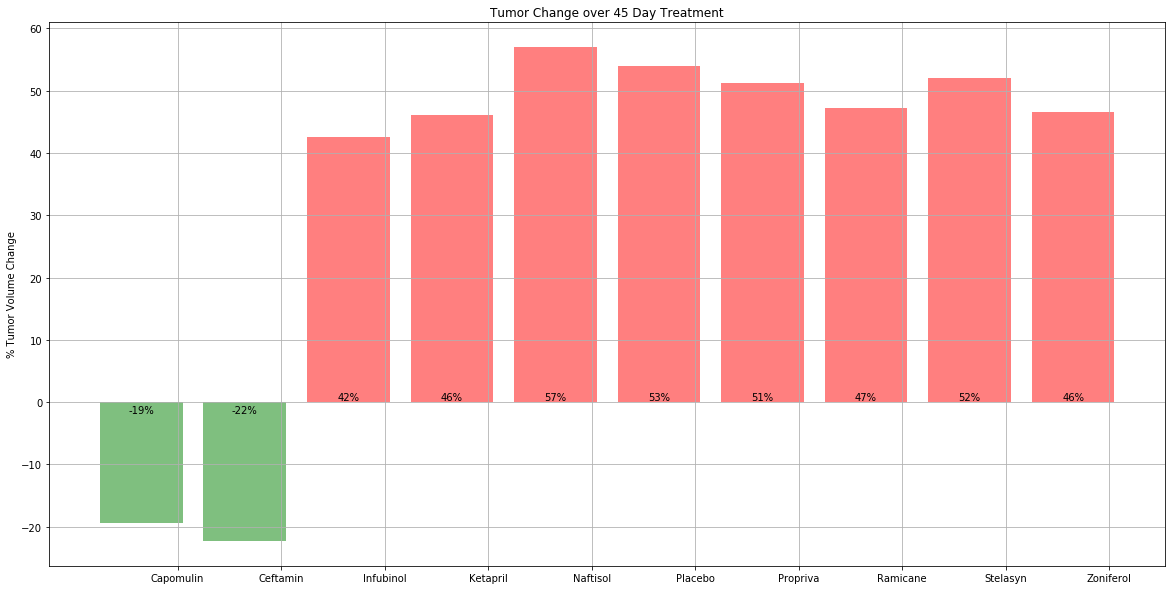

In [27]:
width = 0.35    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ind = np.arange(len(drugs))

plot1 = plt.bar(neg_drugs, neg, color='g', alpha=0.5, align="center")
plot2 = plt.bar(pos_drugs, pos, color='r', alpha=0.5, align="center")

def autolabelpostive(plots):
    """
    Attach a text label above each bar displaying its height
    """
    for i in plots:
        height = int(i.get_height())
        ax.text(i.get_x() + i.get_width()/2., 0,
                 f"{height}%",
                ha='center', va='bottom')
        
def autolabelneg(plots):
    """
    Attach a text label above each bar displaying its height
    """
    for i in plots:
        height = int(i.get_height())
        ax.text(i.get_x() + i.get_width()/2., -2,
                 f"{height}%",
                ha='center', va='bottom')
        

autolabelpostive(plot2)
autolabelneg(plot1)

# add some text for labels, title and axes ticks
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change over 45 Day Treatment')
ax.set_xticks(ind + width )
ax.set_xticklabels(drugs)
ax.grid()



![Metastatic Spread During Treatment](../Images/change.png)